# I. Generate all lattice walks, 2D square lattice

In [1]:
# This I showed in class:


steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def generate_walks(path, L):
    """Generate all random walks on the 2D square lattice.""" #lattice - решётка
    if L == 0:
        print(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            pp = path.copy()
            pp.append((x + dx, y + dy))
            generate_walks(pp, L - 1)

In [2]:
generate_walks([(0, 0)], 1)

[(0, 0), (1, 0)]
[(0, 0), (-1, 0)]
[(0, 0), (0, 1)]
[(0, 0), (0, -1)]


## Store the walks

Printing walks is nice, but not very useful. Better construct a list of all walks, for postprocessing. To this end, add a `cache` parameter, which stores all generated walks.

In [3]:
steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def generate_walks2(path, L, cache):
    if L == 0:
        cache.append(path)
        print(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            xy_new = (x + dx, y + dy)
            pp = path.copy()
            pp.append(xy_new)
            generate_walks2(pp, L - 1, cache)

In [4]:
cache = []
generate_walks2([(0, 0)], 2, cache)

[(0, 0), (1, 0), (2, 0)]
[(0, 0), (1, 0), (0, 0)]
[(0, 0), (1, 0), (1, 1)]
[(0, 0), (1, 0), (1, -1)]
[(0, 0), (-1, 0), (0, 0)]
[(0, 0), (-1, 0), (-2, 0)]
[(0, 0), (-1, 0), (-1, 1)]
[(0, 0), (-1, 0), (-1, -1)]
[(0, 0), (0, 1), (1, 1)]
[(0, 0), (0, 1), (-1, 1)]
[(0, 0), (0, 1), (0, 2)]
[(0, 0), (0, 1), (0, 0)]
[(0, 0), (0, -1), (1, -1)]
[(0, 0), (0, -1), (-1, -1)]
[(0, 0), (0, -1), (0, 0)]
[(0, 0), (0, -1), (0, -2)]


In [5]:
print (cache)

[[(0, 0), (1, 0), (2, 0)], [(0, 0), (1, 0), (0, 0)], [(0, 0), (1, 0), (1, 1)], [(0, 0), (1, 0), (1, -1)], [(0, 0), (-1, 0), (0, 0)], [(0, 0), (-1, 0), (-2, 0)], [(0, 0), (-1, 0), (-1, 1)], [(0, 0), (-1, 0), (-1, -1)], [(0, 0), (0, 1), (1, 1)], [(0, 0), (0, 1), (-1, 1)], [(0, 0), (0, 1), (0, 2)], [(0, 0), (0, 1), (0, 0)], [(0, 0), (0, -1), (1, -1)], [(0, 0), (0, -1), (-1, -1)], [(0, 0), (0, -1), (0, 0)], [(0, 0), (0, -1), (0, -2)]]


## Task 0

Compute the average end-to-end distance of random walks of a given length. What is the scaling of the end-to-end distance with the length of the walk? What is the scaling of the mean *square* end-to-end distance with the length?

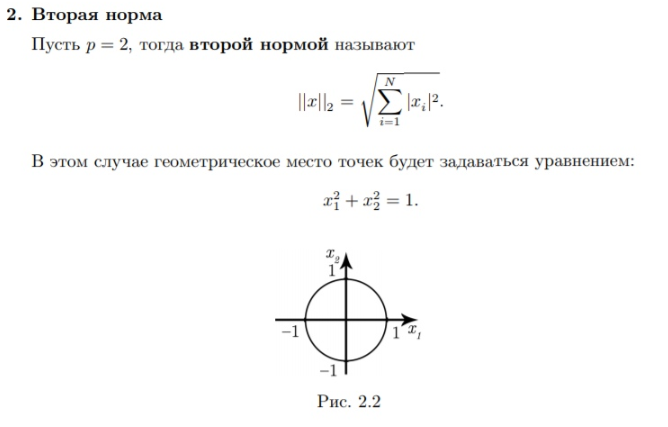

In [6]:
import math
import numpy as np
s = [] # list with length of every step-case
x_coordinates_list = []
y_coordinates_list = []
for i in cache:
    s.append ((i[-1][0]-i[0][0])**2+(i[-1][1]-i[0][1])**2)
    if s[-1] == 0: # because we can't devide on the zero
        pass
    else: # finding of an orthonormalized vector
        x_coordinates_list.append ((float(i[-1][0]-i[0][0]))) 
        y_coordinates_list.append ((float(i[-1][1]-i[0][1])))
s_1 = np.asarray (s)
x_array = np.asarray (x_coordinates_list) #use numpy, because i'll use average
x_avg = np.average (x_coordinates_list)
y_array = np.asarray (y_coordinates_list)
y_avg = np.average (y_coordinates_list)
norma_2 = math.sqrt(np.sum (s_1)/len(cache))
print ('Norma_2:', norma_2)
print ('Average end-to-end distance of random walks of a given length', x_avg, '  ,',y_avg)

Norma_2: 1.4142135623730951
Average end-to-end distance of random walks of a given length 0.0   , 0.0


# I. Generate all SAWs on a 2D square lattice

A self-avoiding walk is a random walk where a lattice site can only be visited once.

In [7]:
steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]
cache_saw = []
spisok_l = []
def generate_SAWs(path, L, cache):
    spisok_l.append(L + 1)
    if L == 0:
        if len(path) == spisok_l[0]:
            cache.append(path)
        else:
            pass
    else:
        for dx, dy in steps:
            x, y = path[-1]
            if (x + dx, y + dy) in path:
                pp = path.copy()
                generate_SAWs(pp, L - 1, cache)
            else:
                xy_new = (x + dx, y + dy)
                pp = path.copy()
                pp.append(xy_new)
                generate_SAWs(pp, L - 1, cache)
generate_SAWs([(0, 0)], 2, cache_saw)
print (cache_saw) # Okay, we can see, that it's right, because every lattice site only visited once 

[[(0, 0), (1, 0), (2, 0)], [(0, 0), (1, 0), (1, 1)], [(0, 0), (1, 0), (1, -1)], [(0, 0), (-1, 0), (-2, 0)], [(0, 0), (-1, 0), (-1, 1)], [(0, 0), (-1, 0), (-1, -1)], [(0, 0), (0, 1), (1, 1)], [(0, 0), (0, 1), (-1, 1)], [(0, 0), (0, 1), (0, 2)], [(0, 0), (0, -1), (1, -1)], [(0, 0), (0, -1), (-1, -1)], [(0, 0), (0, -1), (0, -2)]]


## Task 1

How many walks of a given length are there? What is the mean end-to-end distance of walks of a given length? What is mean *square* of the end-to-end distance?

In [8]:
import math
import numpy as np
s = [] # list with length of every step-case
x_coordinates_list = []
y_coordinates_list = []
for i in cache_saw:
    s.append ((i[-1][0]-i[0][0])**2+(i[-1][1]-i[0][1])**2)
    if s[-1] == 0: # because we can't devide on the zero
        pass
    else: 
        x_coordinates_list.append ((float(i[-1][0]-i[0][0]))) 
        y_coordinates_list.append ((float(i[-1][1]-i[0][1])))
s_1 = np.asarray (s)
x_array = np.asarray (x_coordinates_list) #use numpy, because i'll use average
x_avg = np.average (x_coordinates_list)
y_array = np.asarray (y_coordinates_list)
y_avg = np.average (y_coordinates_list)
norma_2 = math.sqrt(np.sum (s_1)/len(cache_saw))
print ('Norma_2:', norma_2)
print ('Average end-to-end distance of random walks of a given length', x_avg, '  ,',y_avg)

Norma_2: 1.632993161855452
Average end-to-end distance of random walks of a given length 0.0   , 0.0


Extra tasks (for fun, no credit, a possible basis of a course project)

1. Triangular lattice
2. Rewrite the recursive algorithm to use a queue